In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.layers.core import Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from imutils import paths
import numpy as np
import random
import cv2
import os
from matplotlib import pyplot as plt

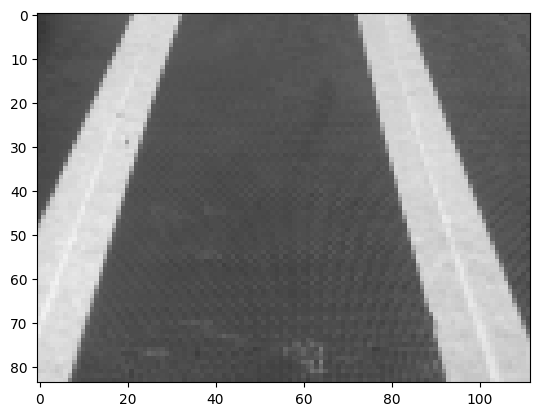

In [41]:
#read the image
dataset = cv2.imread("E:/Hobby_Projects/MLOM/MobilenetV2/datasetlatest/forward/forward_100.jpg")
dataset = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
plt.imshow(dataset)
plt.show()


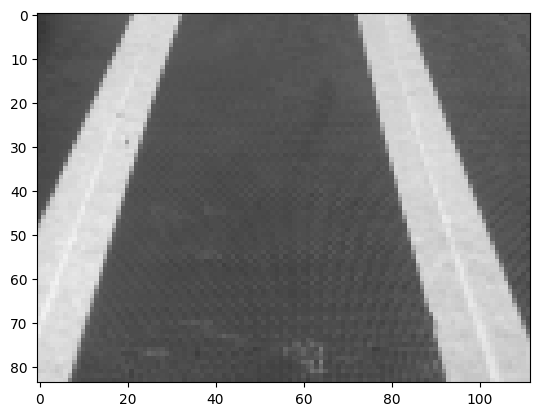

In [42]:
#cropout the top side of the image
crop_image = dataset[0:100, 0:1000]
plt.imshow(crop_image)
plt.show()



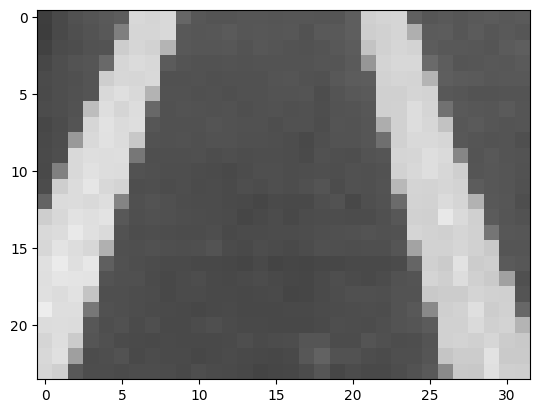

In [43]:
resize_image = cv2.resize(image_path, (32, 24))
plt.imshow(resize_image)
plt.show()

In [44]:
#convert to array
image_array = img_to_array(resize_image)
print(image_array.shape)
#print array values in the imaeg
print(image_array)

(24, 32, 3)
[[[ 62.  62.  62.]
  [ 73.  73.  73.]
  [ 81.  81.  81.]
  ...
  [ 91.  91.  91.]
  [ 88.  88.  88.]
  [ 90.  90.  90.]]

 [[ 61.  61.  61.]
  [ 73.  73.  73.]
  [ 79.  79.  79.]
  ...
  [ 86.  86.  86.]
  [ 89.  89.  89.]
  [ 86.  86.  86.]]

 [[ 65.  65.  65.]
  [ 75.  75.  75.]
  [ 77.  77.  77.]
  ...
  [ 85.  85.  85.]
  [ 91.  91.  91.]
  [ 94.  94.  94.]]

 ...

 [[213. 213. 213.]
  [222. 222. 222.]
  [203. 203. 203.]
  ...
  [214. 214. 214.]
  [204. 204. 204.]
  [201. 201. 201.]]

 [[216. 216. 216.]
  [224. 224. 224.]
  [159. 159. 159.]
  ...
  [226. 226. 226.]
  [202. 202. 202.]
  [202. 202. 202.]]

 [[214. 214. 214.]
  [207. 207. 207.]
  [ 88.  88.  88.]
  ...
  [224. 224. 224.]
  [207. 207. 207.]
  [206. 206. 206.]]]


In [45]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(5, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(10, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # third set of CONV => RELU => POOL layers
        model.add(Conv2D(10, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # fourth set of CONV => RELU => POOL layers
        model.add(Conv2D(10, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # first set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        # output layer
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        # return the constructed network architecture
        return model

In [47]:
dataset = "E:/Hobby_Projects/MLOM/MobilenetV2/datasetlatest"
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
 
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
np.random.seed(42)  # Use np.random.seed for consistency
np.random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 24))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = image.astype("float32") / 255.0  # Normalize to [0, 1]

    data.append(image)
    # extract the class label from the image path and update the labels list
    label = os.path.basename(os.path.dirname(imagePath))  # Get the folder name directly
    if label == 'forward':
        label = 0
    elif label == 'right':
        label = 1
    elif label == 'left':
        label = 2
    elif label == 'stop':
        label = 3
    labels.append(label)



[INFO] loading images...


In [48]:
# convert the lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to one-hot encoded vectors
trainY = to_categorical(trainY, num_classes=4)
testY = to_categorical(testY, num_classes=4)

In [52]:
# Initialize parameters
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

# Initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=32, height=24, depth=1, classes=4)  # Depth is 1 for grayscale
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)

# Save the model to disk
print("[INFO] serializing network...")
model.save("modelcnn")

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
33/33 [==============================] - 2s 25ms/step - loss: 1.2861 - accuracy: 0.4257 - val_loss: 0.9487 - val_accuracy: 0.6543
Epoch 2/20
33/33 [==============================] - 1s 17ms/step - loss: 0.6817 - accuracy: 0.7590 - val_loss: 0.6407 - val_accuracy: 0.7857
Epoch 3/20
33/33 [==============================] - 1s 17ms/step - loss: 0.4207 - accuracy: 0.8581 - val_loss: 0.3943 - val_accuracy: 0.8743
Epoch 4/20
33/33 [==============================] - 1s 16ms/step - loss: 0.3429 - accuracy: 0.8676 - val_loss: 0.3303 - val_accuracy: 0.8829
Epoch 5/20
33/33 [==============================] - 1s 16ms/step - loss: 0.2048 - accuracy: 0.9390 - val_loss: 0.1692 - val_accuracy: 0.9486
Epoch 6/20
33/33 [==============================] - 1s 16ms/step - loss: 0.1427 - accuracy: 0.9581 - val_loss: 0.1229 - val_accuracy: 0.9771
Epoch 7/20
33/33 [==============================] - 0s 15ms/step - loss: 0.0836 - accuracy: 0.9829 - 

INFO:tensorflow:Assets written to: modelcnn\assets


INFO:tensorflow:Assets written to: modelcnn\assets


In [53]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(testX, testY, verbose=0)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9971428513526917


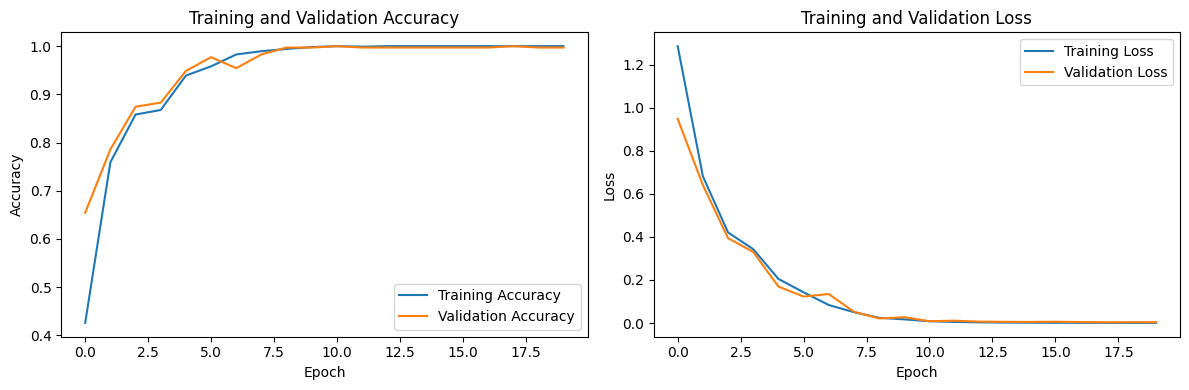

In [57]:
# Plot the training and validation accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

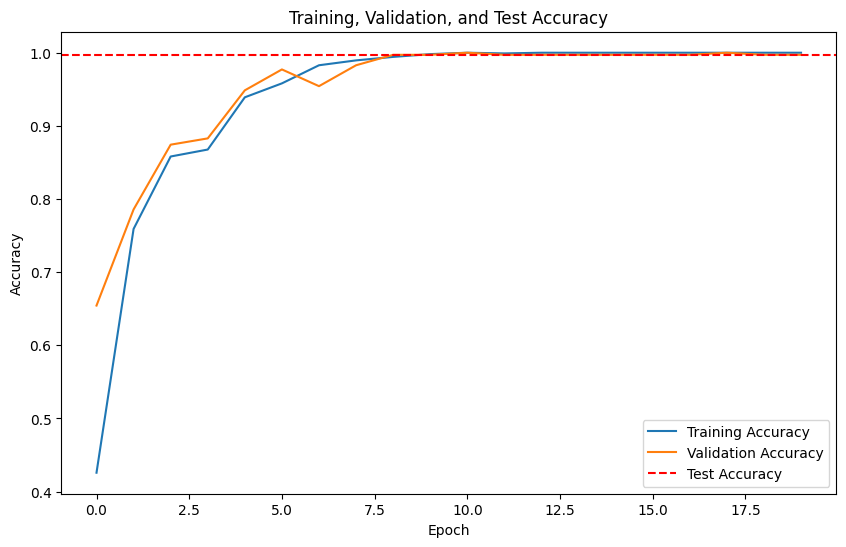

In [58]:
# Plot the testing accuracy and loss
plt.figure(figsize=(10, 6))
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
# Convert the model to TensorFlow Lite with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the quantized model to a file
with open('modelcnn.tflite', 'wb') as f:
    f.write(tflite_model)
# Load the TFLite model
model_path = 'modelcnn.tflite'
with open(model_path, 'rb') as f:
    tflite_model = f.read()

# Convert the TFLite model to a C++ byte array
cpp_array = ', '.join([str(byte) for byte in tflite_model])

# Generate the C++ code
cpp_code = f"const unsigned char model_data[] = {{ {cpp_array} }};\n"

# Save the C++ code to a file
output_file = 'model_data_cnn.cc'
with open(output_file, 'w') as f:
    f.write(cpp_code)

INFO:tensorflow:Assets written to: C:\Users\darsh\AppData\Local\Temp\tmpg0mnpf00\assets


INFO:tensorflow:Assets written to: C:\Users\darsh\AppData\Local\Temp\tmpg0mnpf00\assets
